In [1]:
# !pip install qiskit
# !pip install tqdm quspin
# !pip install pandas
# !pip install pylatexenc
# !pip install torch
# !pip install qiskit_algorithms

In [1]:
from qiskit import * #qiskit
from qiskit.visualization import plot_histogram #for plotting histogram
import numpy as np # for mathematical computation
import matplotlib.pyplot as plt #for plotting graph
#%matplotlib inline

from qiskit_aer import AerSimulator  # change this to Aer for C++ compiled code and the option to run on the GPU. Or use BasicAer for python providers
#from qiskit.algorithms import VQE

In [2]:
#from qiskit.opflow import MatrixOp
from qiskit.quantum_info import Operator, SparsePauliOp
from qiskit.circuit.library import EfficientSU2

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
from cmath import e
from cmath import pi
import cmath
import sympy as sym
from tqdm import tqdm

from scipy import sparse
from scipy.sparse import csr_matrix

from scipy.linalg import expm, logm

from scipy.linalg import eig, eigh
from scipy.sparse.linalg import eigs, eigsh

from scipy.optimize import minimize, Bounds

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
import quspin
import pandas as pd
from tqdm import tqdm
from scipy.integrate import quad
from scipy.optimize import curve_fit
import csv
import scipy.stats
from scipy.linalg import logm, expm

from quspin.operators import hamiltonian,exp_op
from quspin.basis import spinful_fermion_basis_general
from quspin.basis import spin_basis_1d
from quspin.basis import spinless_fermion_basis_1d
from quspin.basis import tensor_basis
from quspin.tools.measurements import ent_entropy

from matplotlib import rc


from quspin.tools.evolution import evolve
from quspin.tools.Floquet import Floquet_t_vec 
from six import iteritems 

import time

In [5]:
import qiskit
qiskit.__version__

'1.3.2'

# Hamiltonian

In [7]:
from scipy.sparse import identity
import scipy.sparse as sp
from scipy.linalg import expm, sqrtm, eigh, eigvalsh
from scipy.sparse.linalg import eigsh

def H_spin(m, a,g,L):
    hop_term=[[0.25/a, j, j+1] for j in range(L-1)]

    
    hop_mass=[[0.5*m*(-1)**(j+1), j] for j in range(L)]
    
    hop_zz_g=[[0.25*g/a, j, j+1] for j in range(L-1)]
    hop_z1_g=[[0.25*g/a, j] for j in range(L-1)]
    hop_z2_g=[[0.25*g/a, j+1] for j in range(L-1)]
    ID=[[0.25*(g/a),n] for n in range(L)]
        
    basis = spin_basis_1d(L)

    # Define Hamiltonian
    static = [["xx",hop_term],["yy",hop_term], ["z", hop_mass], ["zz",hop_zz_g],["z",hop_z1_g],["z",hop_z2_g], ["I",ID]]
    dynamic = []
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.complex128,
                    check_symm=False,check_herm=False,check_pcon=False)
    
    # Find ground state and its energy
    return H#+((g/a)*0.25*(L-1))*identity(2**L)

In [63]:
N = 8

a = 0.5
m = 1.0
g = 1.0

In [66]:
Ham = H_spin(m, a, g, N)

In [68]:
Ham

<quspin.operators.hamiltonian:
static mat: <Compressed Sparse Row sparse matrix of dtype 'complex128'
	with 1152 stored elements and shape (256, 256)>
dynamic:>

In [70]:
E,V=Ham.eigsh(k=5,which="SA")

In [72]:
E

array([-5.22343851, -4.59082327, -4.16472945, -3.72966916, -3.43818965])

In [75]:
qubitHam = Operator(Ham.toarray())

In [77]:
Ham_qiskit = SparsePauliOp.from_operator(qubitHam, atol=None, rtol=None)

In [79]:
Ham_qiskit

SparsePauliOp(['IIIIIIII', 'IIIIIIIZ', 'IIIIIIXX', 'IIIIIIYY', 'IIIIIIZI', 'IIIIIIZZ', 'IIIIIXXI', 'IIIIIYYI', 'IIIIIZII', 'IIIIIZZI', 'IIIIXXII', 'IIIIYYII', 'IIIIZIII', 'IIIIZZII', 'IIIXXIII', 'IIIYYIII', 'IIIZIIII', 'IIIZZIII', 'IIXXIIII', 'IIYYIIII', 'IIZIIIII', 'IIZZIIII', 'IXXIIIII', 'IYYIIIII', 'IZIIIIII', 'IZZIIIII', 'XXIIIIII', 'YYIIIIII', 'ZZIIIIII'],
              coeffs=[4. +0.j, 1. +0.j, 0.5+0.j, 0.5-0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5-0.j,
 1.5+0.j, 0.5+0.j, 0.5+0.j, 0.5-0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5-0.j,
 1.5+0.j, 0.5+0.j, 0.5+0.j, 0.5-0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5-0.j,
 1.5+0.j, 0.5+0.j, 0.5+0.j, 0.5-0.j, 0.5+0.j])

In [123]:
#ansatz = EfficientSU2(N, su2_gates=['ry'], entanglement="pairwise", reps=6)

#ansatz = EfficientSU2(N, su2_gates=['ry'], entanglement="linear", reps=4)
# ansatz = EfficientSU2(N, su2_gates=['ry'], entanglement="full", reps=4)
ansatz = EfficientSU2(N, su2_gates=['ry'], entanglement="pairwise", reps=N)

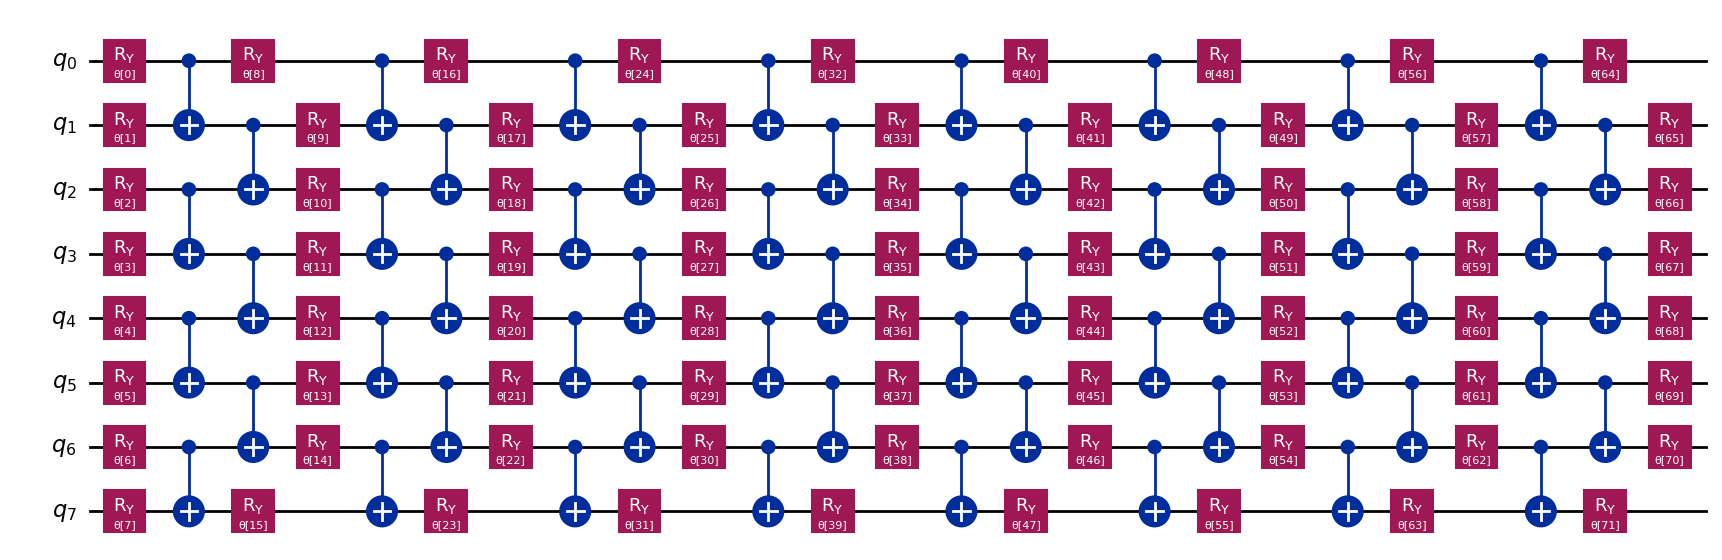

In [127]:
ansatz.decompose().draw('mpl', fold=-1)

In [129]:
x0 = [np.pi/2] * ansatz.num_parameters

In [131]:
x0

[1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267

In [133]:
len(x0)

72

# Estimator V1

In [135]:
from qiskit.primitives import Estimator # Estimator V1
from qiskit_ibm_runtime import QiskitRuntimeService
#from qiskit import Aer, BasicAer, assemble
#from qiskit_ibm_runtime import Estimator

In [138]:
backend = AerSimulator()
estimator_v1 = Estimator()

C:\Users\yukwa\AppData\Local\Temp\ipykernel_32228\3976521138.py:2: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator_v1 = Estimator()


In [140]:
estimator_v1

In [103]:
def costFunctionE1(param, ansatz, Ham, params, expectations):
    params.append(param)
    start = time.time()
    job = estimator_v1.run([ansatz], [Ham], [param])
    result = job.result()
    exp = result.values[0]
    #print('run() time: ', time.time() - start)      
    expectations.append(exp)
    return exp

## COBYLA

In [106]:
params = []
expectations = []
maxiter = 1000

start_time = time.time()
result = minimize(costFunctionE1, x0, (ansatz, Ham_qiskit, params, expectations), method='COBYLA', options={'maxiter': maxiter}) # Success [2.71211263, 1.5909917 ]

print("--- minimize() running time: %s seconds ---\n" % (time.time() - start_time))
theta = result.x
print(result)
print(theta)
print(result.fun)

--- minimize() running time: 6.970410585403442 seconds ---

 message: Maximum number of function evaluations has been exceeded.
 success: False
  status: 2
     fun: -4.303036043400685
       x: [ 3.056e+00  3.557e+00 ...  3.162e+00  1.336e+00]
    nfev: 1000
   maxcv: 0.0
[ 3.05645576  3.55725005  1.56447936  2.06235186  3.76037465  3.15892497
  2.28841366  3.09380202  3.1025379   0.24617376  1.57719811  1.59812772
  1.54862666  1.62872193  1.60208325  1.66383377  1.90389813  1.33709664
  1.07495583 -0.07745072  1.52380219  3.04154795  1.13842512  2.18197174
  1.48260402  1.9832513   1.60437383  0.98145501  1.61817283  1.70640332
  1.1964097   1.59465738  0.44356747  0.24466786  0.07784748 -0.05154917
  3.16245122  1.67376933  3.16183968  1.33583933]
-4.303036043400685


In [107]:
E

array([-5.22343851, -4.59082327, -4.16472945, -3.72966916, -3.43818965])

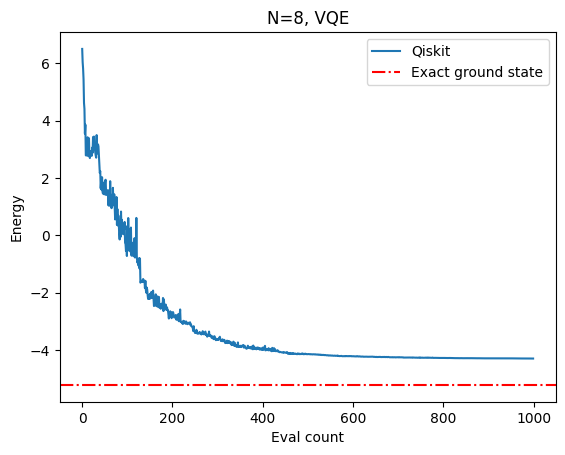

In [109]:
import numpy as np
import pylab
import matplotlib.pyplot as plt

#pylab.rcParams["figure.figsize"] = (12, 8)

#steps_np = np.asarray(steps)
#counts_np = np.asarray(counts)
#values_np = np.asarray(values)

#pylab.plot(range(maxiter),expectations[:maxiter], label=f"Qiskit VQE state")
pylab.plot(range(len(expectations)),expectations, label=f"Qiskit")
plt.axhline(y=E[0], color='r', linestyle='-.', label=f"Exact ground state")

pylab.xlabel("Eval count")
pylab.ylabel("Energy")
#pylab.title("Energy convergence for each computed state")
plt.title('N=8, VQE')
pylab.legend(loc="upper right")

## Adam

In [142]:
from qiskit_algorithms.gradients import ParamShiftEstimatorGradient
from qiskit.primitives import Estimator
import torch
import numpy as np
import time

# Initialize estimator and gradient
estimator = Estimator()
gradient = ParamShiftEstimatorGradient(estimator)

params = torch.tensor(x0, dtype=torch.float64, requires_grad=True)
optimizer = torch.optim.Adam([params], lr=0.01)

maxiter = 1000
expectations = []

start_time = time.time()
for i in range(maxiter):
    optimizer.zero_grad()
    
    # Convert torch params to numpy for qiskit
    param_np = params.detach().numpy()

    # Compute expectation value (loss)
    job = estimator.run([ansatz], [Ham_qiskit], [param_np])
    expval = job.result().values[0]

    # Compute gradient via parameter-shift rule
    grad_job = gradient.run([ansatz], [Ham_qiskit], [param_np])
    grad_result = grad_job.result().gradients[0]

    # Manually set gradient for params
    params.grad = torch.tensor(grad_result, dtype=torch.float64)

    # Perform optimization step
    optimizer.step()
    
    expectations.append(expval)
    
    if (i + 1) % 50 == 0:
        print(f'Iteration {i+1}/{maxiter}, Cost: {expval}')

print("--- Adam optimizer running time: %s seconds ---\n" % (time.time() - start_time))

optimized_theta = params.detach().numpy()
print("Optimized Parameters (theta):", optimized_theta)
print("Final minimized cost:", expectations[-1])

C:\Users\yukwa\AppData\Local\Temp\ipykernel_32228\365748969.py:8: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


Iteration 50/1000, Cost: -2.242469251743871
Iteration 100/1000, Cost: -2.971251288474328
Iteration 150/1000, Cost: -3.6077977766737575
Iteration 200/1000, Cost: -4.392349728443753
Iteration 250/1000, Cost: -4.669713709715754
Iteration 300/1000, Cost: -4.825437946877768
Iteration 350/1000, Cost: -4.874353011255344
Iteration 400/1000, Cost: -4.892615823758886
Iteration 450/1000, Cost: -4.90889897540884
Iteration 500/1000, Cost: -4.92586883498615
Iteration 550/1000, Cost: -4.9409064606629105
Iteration 600/1000, Cost: -4.952899455132147
Iteration 650/1000, Cost: -4.963836273460437
Iteration 700/1000, Cost: -4.97789300279812
Iteration 750/1000, Cost: -4.999673027414026
Iteration 800/1000, Cost: -5.027571647681224
Iteration 850/1000, Cost: -5.050513409044482
Iteration 900/1000, Cost: -5.0629291053022465
Iteration 950/1000, Cost: -5.069864844451349
Iteration 1000/1000, Cost: -5.074260892726525
--- Adam optimizer running time: 1189.6362137794495 seconds ---

Optimized Parameters (theta): [ 1.0

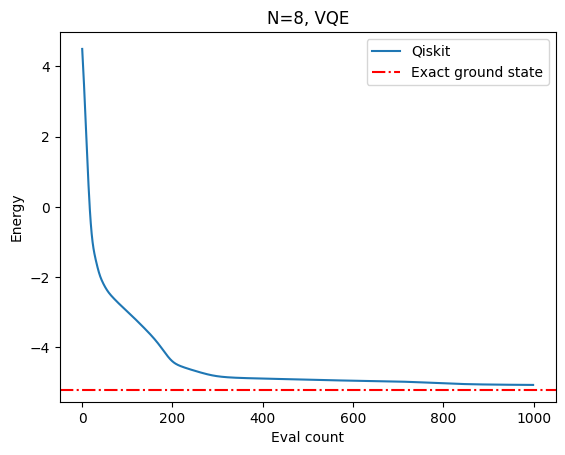

In [143]:
#plt.plot(range(maxiter),expectations[:maxiter], label=f"Qiskit VQE state")
plt.plot(range(len(expectations)),expectations, label=f"Qiskit")
plt.axhline(y=E[0], color='r', linestyle='-.', label=f"Exact ground state")

plt.xlabel("Eval count")
plt.ylabel("Energy")
#plt.title("Energy convergence for each computed state")
plt.title('N=8, VQE')
plt.legend(loc="upper right")

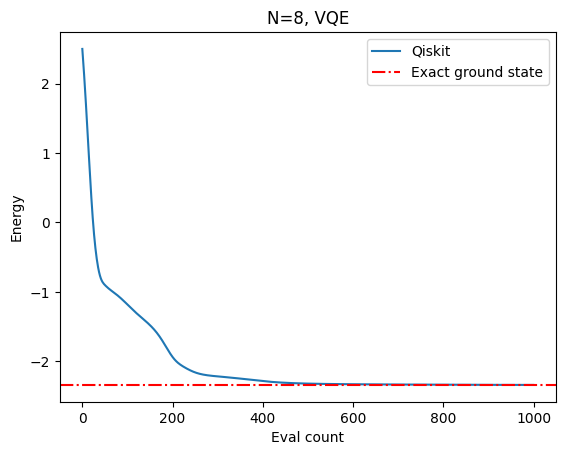

In [57]:
import numpy as np
import pylab
import matplotlib.pyplot as plt

#pylab.rcParams["figure.figsize"] = (12, 8)

#steps_np = np.asarray(steps)
#counts_np = np.asarray(counts)
#values_np = np.asarray(values)

#pylab.plot(range(maxiter),expectations[:maxiter], label=f"Qiskit VQE state")
pylab.plot(range(len(expectations)),expectations, label=f"Qiskit")
plt.axhline(y=E[0], color='r', linestyle='-.', label=f"Exact ground state")

pylab.xlabel("Eval count")
pylab.ylabel("Energy")
#pylab.title("Energy convergence for each computed state")
plt.title('N=8, VQE')
pylab.legend(loc="upper right")

## Stochastic Gradient Descent

In [30]:
from qiskit_algorithms.gradients import ParamShiftEstimatorGradient
from qiskit.primitives import Estimator
import torch
import numpy as np
import time

# Initialize estimator and gradient
estimator = Estimator()
gradient = ParamShiftEstimatorGradient(estimator)

params = torch.tensor(x0, dtype=torch.float64, requires_grad=True)
optimizer = torch.optim.SGD([params], lr=0.01)

maxiter = 1000
expectations = []

start_time = time.time()
for i in range(maxiter):
    optimizer.zero_grad()
    
    # Convert torch params to numpy for qiskit
    param_np = params.detach().numpy()

    # Compute expectation value (loss)
    job = estimator.run([ansatz], [Ham_qiskit], [param_np])
    expval = job.result().values[0]

    # Compute gradient via parameter-shift rule
    grad_job = gradient.run([ansatz], [Ham_qiskit], [param_np])
    grad_result = grad_job.result().gradients[0]

    # Manually set gradient for params
    params.grad = torch.tensor(grad_result, dtype=torch.float64)

    # Perform optimization step
    optimizer.step()
    
    expectations.append(expval)
    
    if (i + 1) % 50 == 0:
        print(f'Iteration {i+1}/{maxiter}, Cost: {expval}')

print("--- Adam optimizer running time: %s seconds ---\n" % (time.time() - start_time))

optimized_theta = params.detach().numpy()
print("Optimized Parameters (theta):", optimized_theta)
print("Final minimized cost:", expectations[-1])

/tmp/ipykernel_211617/681752068.py:8: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


Iteration 50/1000, Cost: -0.7509829366079883
Iteration 100/1000, Cost: -1.5907507564403396
Iteration 150/1000, Cost: -1.994860279954664
Iteration 200/1000, Cost: -2.120050748068147
Iteration 250/1000, Cost: -2.1734781741999307
Iteration 300/1000, Cost: -2.2056147364966026
Iteration 350/1000, Cost: -2.2267437110865345
Iteration 400/1000, Cost: -2.2409113976200787
Iteration 450/1000, Cost: -2.250742000699744
Iteration 500/1000, Cost: -2.2580035402306464
Iteration 550/1000, Cost: -2.2637945972508127
Iteration 600/1000, Cost: -2.268744638070954
Iteration 650/1000, Cost: -2.273191322046576
Iteration 700/1000, Cost: -2.2773060778508265
Iteration 750/1000, Cost: -2.2811714500193934
Iteration 800/1000, Cost: -2.284824757661059
Iteration 850/1000, Cost: -2.2882814691408178
Iteration 900/1000, Cost: -2.291547365041353
Iteration 950/1000, Cost: -2.294624772602665
Iteration 1000/1000, Cost: -2.2975156941380166
--- Adam optimizer running time: 145.44768977165222 seconds ---

Optimized Parameters (t

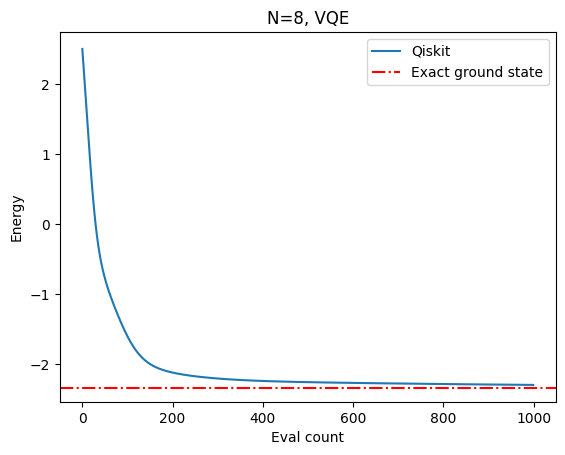

In [31]:
import numpy as np
import pylab
import matplotlib.pyplot as plt

#pylab.rcParams["figure.figsize"] = (12, 8)

#steps_np = np.asarray(steps)
#counts_np = np.asarray(counts)
#values_np = np.asarray(values)

#pylab.plot(range(maxiter),expectations[:maxiter], label=f"Qiskit VQE state")
pylab.plot(range(len(expectations)),expectations, label=f"Qiskit")
plt.axhline(y=E[0], color='r', linestyle='-.', label=f"Exact ground state")

pylab.xlabel("Eval count")
pylab.ylabel("Energy")
#pylab.title("Energy convergence for each computed state")
plt.title('N=8, VQE')
pylab.legend(loc="upper right")

## RMSprop

In [150]:
from qiskit_algorithms.gradients import ParamShiftEstimatorGradient
from qiskit.primitives import Estimator
import torch
import numpy as np
import time

# Initialize estimator and gradient
estimator = Estimator()
gradient = ParamShiftEstimatorGradient(estimator)

params = torch.tensor(x0, dtype=torch.float64, requires_grad=True)
optimizer = torch.optim.RMSprop([params], lr=0.01)

maxiter = 2000
expectations = []

start_time = time.time()
for i in range(maxiter):
    optimizer.zero_grad()
    
    # Convert torch params to numpy for qiskit
    param_np = params.detach().numpy()

    # Compute expectation value (loss)
    job = estimator.run([ansatz], [Ham_qiskit], [param_np])
    expval = job.result().values[0]

    # Compute gradient via parameter-shift rule
    grad_job = gradient.run([ansatz], [Ham_qiskit], [param_np])
    grad_result = grad_job.result().gradients[0]

    # Manually set gradient for params
    params.grad = torch.tensor(grad_result, dtype=torch.float64)

    # Perform optimization step
    optimizer.step()
    
    expectations.append(expval)
    
    if (i + 1) % 50 == 0:
        print(f'Iteration {i+1}/{maxiter}, Cost: {expval}')

print("--- Adam optimizer running time: %s seconds ---\n" % (time.time() - start_time))

optimized_theta = params.detach().numpy()
print("Optimized Parameters (theta):", optimized_theta)
print("Final minimized cost:", expectations[-1])

C:\Users\yukwa\AppData\Local\Temp\ipykernel_32228\3173875150.py:8: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


Iteration 50/2000, Cost: -3.5657761685495424
Iteration 100/2000, Cost: -4.737323823441192
Iteration 150/2000, Cost: -4.916248252493666
Iteration 200/2000, Cost: -4.944028918163205
Iteration 250/2000, Cost: -4.983227812367191
Iteration 300/2000, Cost: -5.024400789507794
Iteration 350/2000, Cost: -5.069266716124662
Iteration 400/2000, Cost: -5.106296141674182
Iteration 450/2000, Cost: -5.12406411299297
Iteration 500/2000, Cost: -5.125638419406253
Iteration 550/2000, Cost: -5.1453455152342
Iteration 600/2000, Cost: -5.142850737836291
Iteration 650/2000, Cost: -5.152158271242256
Iteration 700/2000, Cost: -5.150805884713158
Iteration 750/2000, Cost: -5.152853172774172
Iteration 800/2000, Cost: -5.14978790314464
Iteration 850/2000, Cost: -5.151052201587673
Iteration 900/2000, Cost: -5.153849684864595
Iteration 950/2000, Cost: -5.1577764975424705
Iteration 1000/2000, Cost: -5.156363975992644
Iteration 1050/2000, Cost: -5.15017726310613
Iteration 1100/2000, Cost: -5.15439790511979
Iteration 11

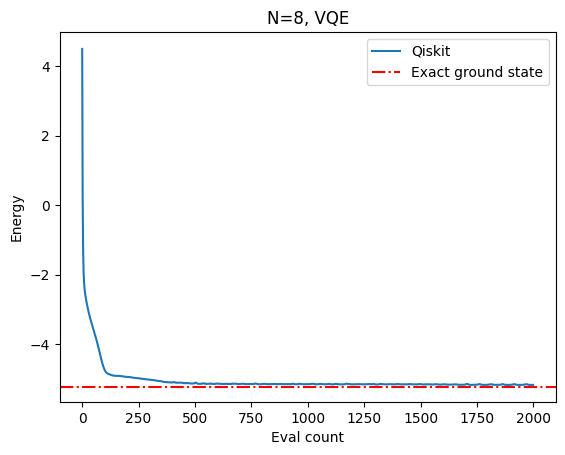

In [151]:
plt.plot(range(len(expectations)),expectations, label=f"Qiskit")
plt.axhline(y=E[0], color='r', linestyle='-.', label=f"Exact ground state")

plt.xlabel("Eval count")
plt.ylabel("Energy")
#plt.title("Energy convergence for each computed state")
plt.title('N=8, VQE')
plt.legend(loc="upper right")

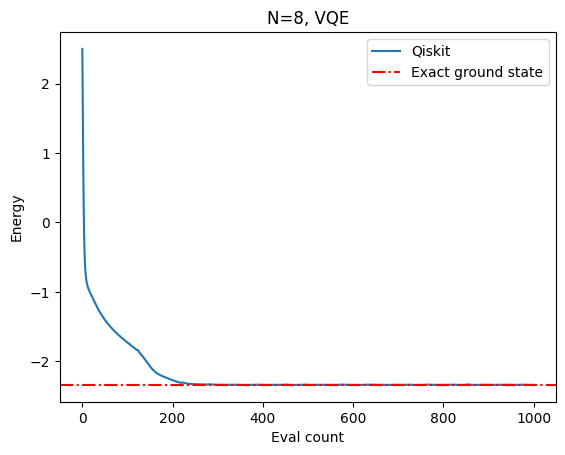

In [61]:
import numpy as np
import pylab
import matplotlib.pyplot as plt

#pylab.rcParams["figure.figsize"] = (12, 8)

#steps_np = np.asarray(steps)
#counts_np = np.asarray(counts)
#values_np = np.asarray(values)

#pylab.plot(range(maxiter),expectations[:maxiter], label=f"Qiskit VQE state")
pylab.plot(range(len(expectations)),expectations, label=f"Qiskit")
plt.axhline(y=E[0], color='r', linestyle='-.', label=f"Exact ground state")

pylab.xlabel("Eval count")
pylab.ylabel("Energy")
#pylab.title("Energy convergence for each computed state")
plt.title('N=8, VQE')
pylab.legend(loc="upper right")

# Estimator V2

In [34]:
#from qiskit.primitives import Estimator # Estimator V1
from qiskit_ibm_runtime import QiskitRuntimeService

from qiskit_aer import AerSimulator
#from qiskit_aer.primitives import SamplerV2 as Sampler_aer
#from qiskit_aer.primitives import EstimatorV2 as Estimator_aer
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager


In [35]:
backend = AerSimulator()
estimator_v2 = Estimator(backend)
estimator_v2.options.default_shots = 50000

In [36]:
estimator_v2

In [37]:
def costFunctionE2(param, ansatz, Ham, params, expectations):

    #estimator = Estimator()
    
    params.append(param)
    
    start = time.time()

    pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
    isa_circuit = pm.run(ansatz)
    isa_observable = Ham_qiskit.apply_layout(isa_circuit.layout)
    job = estimator_v2.run([(ansatz, Ham, param)])

    #job = estimator.run([(ansatz, Ham, param)])
    result = job.result()
    #print(result)
    exp = float(result[0].data.evs)
    
    #print('run() time: ', time.time() - start)
    
        

    expectations.append(exp)
    
    
    return exp

In [38]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_circuit = pm.run(ansatz)
isa_observable = Ham_qiskit.apply_layout(isa_circuit.layout)
costFunctionE2(x0, isa_circuit, isa_observable, [], [])

2.4930799999999995

In [39]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_circuit = pm.run(ansatz)
isa_observable = Ham_qiskit.apply_layout(isa_circuit.layout)
costFunctionE2(theta, isa_circuit, isa_observable, [], [])

-2.2207399999999997

In [40]:
x0 = [np.pi/2] * ansatz.num_parameters

In [41]:
x0 = theta

In [42]:
x0

array([1.38636534, 1.71757203, 2.18417085, 2.9315533 , 1.44420503,
       2.06541873, 0.8411554 , 1.5793753 , 0.99814297, 1.34505387,
       3.39269868, 2.36228105, 1.68158013, 1.55869085, 1.13046131,
       1.48795213, 1.58630576, 1.7054881 , 2.77292795, 1.39202792])

## COBYLA

In [43]:
params = []
expectations = []
maxiter = 1000

start_time = time.time()

pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_circuit = pm.run(ansatz)
isa_observable = Ham_qiskit.apply_layout(isa_circuit.layout)

result = minimize(costFunctionE2, x0, (isa_circuit, isa_observable, params, expectations), method='COBYLA', options={'maxiter': maxiter}, tol=1e-20) # Success [2.71211263, 1.5909917 ]
#, tol=1e-3

print("--- minimize() running time: %s seconds ---\n" % (time.time() - start_time))
theta = result.x
print(result)
print(theta)
print(result.fun)

--- minimize() running time: 2481.1296331882477 seconds ---

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -2.2022800000000005
       x: [ 1.433e+00  1.719e+00 ...  2.765e+00  1.341e+00]
    nfev: 675
   maxcv: 0.0
[1.43281287 1.71870739 2.18137097 2.9457652  1.43213754 2.17949045
 0.76865045 1.5453733  0.98468439 1.32767976 3.39259543 2.34781066
 1.66196974 1.53380668 1.1310503  1.46384962 1.57495868 1.72020114
 2.76513214 1.34060039]
-2.2022800000000005


In [44]:
E

array([-2.34152542, -1.40211303, -0.6755705 ,  0.33600419,  0.5       ])

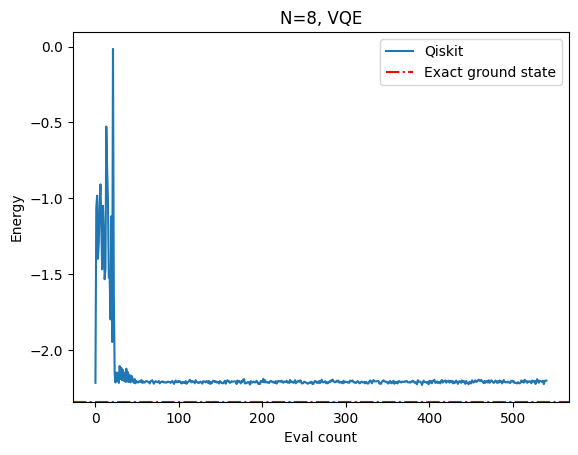

In [45]:
import numpy as np
import pylab
import matplotlib.pyplot as plt

#pylab.rcParams["figure.figsize"] = (12, 8)

#steps_np = np.asarray(steps)
#counts_np = np.asarray(counts)
#values_np = np.asarray(values)

#pylab.plot(range(maxiter),expectations[:maxiter], label=f"Qiskit VQE state")
pylab.plot(range(len(expectations)),expectations, label=f"Qiskit")
plt.axhline(y=E[0], color='r', linestyle='-.', label=f"Exact ground state")

pylab.xlabel("Eval count")
pylab.ylabel("Energy")
#pylab.title("Energy convergence for each computed state")
plt.title('N=8, VQE')
pylab.legend(loc="upper right")

In [46]:
print(time.ctime())

Tue Mar 11 00:55:26 2025


## Adam

In [47]:
import torch
import numpy as np
import time
from qiskit_algorithms.gradients import ParamShiftEstimatorGradient
from qiskit.primitives import Estimator  # EstimatorV1 (deprecated but currently compatible)
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Set initial parameters
params_torch = torch.tensor(x0, dtype=torch.float64, requires_grad=True)

# Initialize Qiskit Estimator (V1) and gradient calculator
estimator = Estimator()
gradient = ParamShiftEstimatorGradient(estimator)

# Adam optimizer from PyTorch
optimizer = torch.optim.Adam([params_torch], lr=0.01)

maxiter = 1000
expectations = []

# Prepare transpiled circuit and observable (once, outside the loop)
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_circuit = pm.run(ansatz)
isa_observable = Ham_qiskit.apply_layout(isa_circuit.layout)

start_time = time.time()
for i in range(maxiter):
    optimizer.zero_grad()

    # Current parameters to numpy for Qiskit
    param_np = params_torch.detach().numpy()

    # Evaluate the expectation value using estimator
    job = estimator.run([isa_circuit], [isa_observable], [param_np])
    result = job.result()
    expval = result.values[0]

    # Compute gradients using Qiskit's parameter shift rule
    grad_job = gradient.run([isa_circuit], [isa_observable], [param_np])
    grad_result = grad_job.result().gradients[0]

    # Set computed gradients to PyTorch tensor
    params_torch.grad = torch.tensor(grad_result, dtype=torch.float64)

    # Update parameters
    optimizer.step()

    # Save and print expectation value
    expectations.append(expval)

    if (i + 1) % 50 == 0:
        print(f'Iteration {i+1}/{maxiter}, Cost: {expval}')

print("--- Adam optimizer running time: %s seconds ---\n" % (time.time() - start_time))

# Optimized parameters and final minimized cost
optimized_theta = params_torch.detach().numpy()
print("Optimized Parameters (theta):", optimized_theta)
print("Final minimized cost:", expectations[-1])

/tmp/ipykernel_211617/2857844082.py:12: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


Iteration 50/1000, Cost: -2.2476455229611974
Iteration 100/1000, Cost: -2.3117837656575246
Iteration 150/1000, Cost: -2.3402621091863285
Iteration 200/1000, Cost: -2.3414513511698924
Iteration 250/1000, Cost: -2.341522356831383
Iteration 300/1000, Cost: -2.341525360727072
Iteration 350/1000, Cost: -2.3415254173957725
Iteration 400/1000, Cost: -2.3415254177133744
Iteration 450/1000, Cost: -2.3415254177133695
Iteration 500/1000, Cost: -2.3415254177133766
Iteration 550/1000, Cost: -2.341525417713376
Iteration 600/1000, Cost: -2.341525417713377
Iteration 650/1000, Cost: -2.341525417713377
Iteration 700/1000, Cost: -2.341525417713378
Iteration 750/1000, Cost: -2.341525417713375
Iteration 800/1000, Cost: -2.3415254177133757
Iteration 850/1000, Cost: -2.341525417713376
Iteration 900/1000, Cost: -2.3415254177133757
Iteration 950/1000, Cost: -2.341525417713376
Iteration 1000/1000, Cost: -2.3415254177133766
--- Adam optimizer running time: 145.27102851867676 seconds ---

Optimized Parameters (th

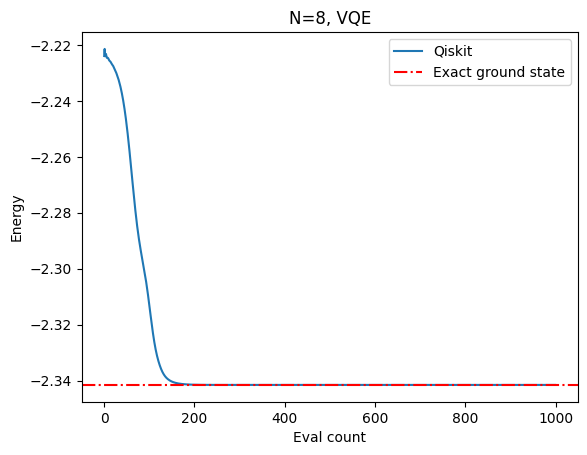

In [48]:
import numpy as np
import pylab
import matplotlib.pyplot as plt

#pylab.rcParams["figure.figsize"] = (12, 8)

#steps_np = np.asarray(steps)
#counts_np = np.asarray(counts)
#values_np = np.asarray(values)

#pylab.plot(range(maxiter),expectations[:maxiter], label=f"Qiskit VQE state")
pylab.plot(range(len(expectations)),expectations, label=f"Qiskit")
plt.axhline(y=E[0], color='r', linestyle='-.', label=f"Exact ground state")

pylab.xlabel("Eval count")
pylab.ylabel("Energy")
#pylab.title("Energy convergence for each computed state")
plt.title('N=8, VQE')
pylab.legend(loc="upper right")

## Stochastic Gradient Descent

In [49]:
import torch
import numpy as np
import time
from qiskit_algorithms.gradients import ParamShiftEstimatorGradient
from qiskit.primitives import Estimator  # EstimatorV1 (deprecated but currently compatible)
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Set initial parameters
params_torch = torch.tensor(x0, dtype=torch.float64, requires_grad=True)

# Initialize Qiskit Estimator (V1) and gradient calculator
estimator = Estimator()
gradient = ParamShiftEstimatorGradient(estimator)

# Adam optimizer from PyTorch
optimizer = torch.optim.SGD([params_torch], lr=0.01)

maxiter = 1000
expectations = []

# Prepare transpiled circuit and observable (once, outside the loop)
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_circuit = pm.run(ansatz)
isa_observable = Ham_qiskit.apply_layout(isa_circuit.layout)

start_time = time.time()
for i in range(maxiter):
    optimizer.zero_grad()

    # Current parameters to numpy for Qiskit
    param_np = params_torch.detach().numpy()

    # Evaluate the expectation value using estimator
    job = estimator.run([isa_circuit], [isa_observable], [param_np])
    result = job.result()
    expval = result.values[0]

    # Compute gradients using Qiskit's parameter shift rule
    grad_job = gradient.run([isa_circuit], [isa_observable], [param_np])
    grad_result = grad_job.result().gradients[0]

    # Set computed gradients to PyTorch tensor
    params_torch.grad = torch.tensor(grad_result, dtype=torch.float64)

    # Update parameters
    optimizer.step()

    # Save and print expectation value
    expectations.append(expval)

    if (i + 1) % 50 == 0:
        print(f'Iteration {i+1}/{maxiter}, Cost: {expval}')

print("--- Adam optimizer running time: %s seconds ---\n" % (time.time() - start_time))

# Optimized parameters and final minimized cost
optimized_theta = params_torch.detach().numpy()
print("Optimized Parameters (theta):", optimized_theta)
print("Final minimized cost:", expectations[-1])

/tmp/ipykernel_211617/1327865060.py:12: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


Iteration 50/1000, Cost: -2.2241312791182377
Iteration 100/1000, Cost: -2.2242742279890937
Iteration 150/1000, Cost: -2.2244188487904024
Iteration 200/1000, Cost: -2.2245662360109972
Iteration 250/1000, Cost: -2.2247169728759366
Iteration 300/1000, Cost: -2.2248715052059134
Iteration 350/1000, Cost: -2.2250302207237413
Iteration 400/1000, Cost: -2.2251934787103878
Iteration 450/1000, Cost: -2.225361624590083
Iteration 500/1000, Cost: -2.2255349983339086
Iteration 550/1000, Cost: -2.225713939839298
Iteration 600/1000, Cost: -2.2258987926623104
Iteration 650/1000, Cost: -2.2260899067932636
Iteration 700/1000, Cost: -2.226287640855997
Iteration 750/1000, Cost: -2.226492363952902
Iteration 800/1000, Cost: -2.2267044572904986
Iteration 850/1000, Cost: -2.226924315669583
Iteration 900/1000, Cost: -2.2271523488930107
Iteration 950/1000, Cost: -2.227388983125084
Iteration 1000/1000, Cost: -2.227634662224029
--- Adam optimizer running time: 146.11664462089539 seconds ---

Optimized Parameters (

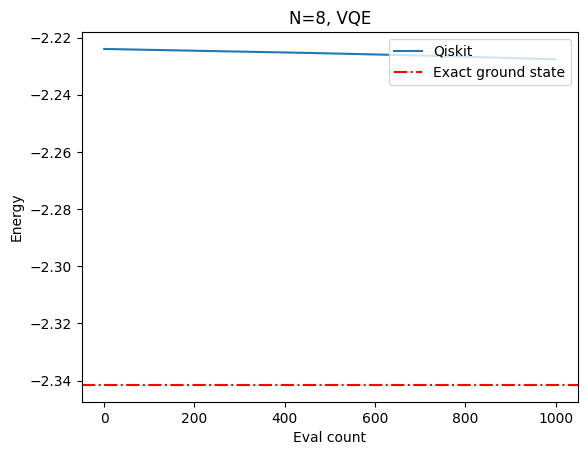

In [50]:
import numpy as np
import pylab
import matplotlib.pyplot as plt

#pylab.rcParams["figure.figsize"] = (12, 8)

#steps_np = np.asarray(steps)
#counts_np = np.asarray(counts)
#values_np = np.asarray(values)

#pylab.plot(range(maxiter),expectations[:maxiter], label=f"Qiskit VQE state")
pylab.plot(range(len(expectations)),expectations, label=f"Qiskit")
plt.axhline(y=E[0], color='r', linestyle='-.', label=f"Exact ground state")

pylab.xlabel("Eval count")
pylab.ylabel("Energy")
#pylab.title("Energy convergence for each computed state")
plt.title('N=8, VQE')
pylab.legend(loc="upper right")

## RMSprop

In [51]:
import torch
import numpy as np
import time
from qiskit_algorithms.gradients import ParamShiftEstimatorGradient
from qiskit.primitives import Estimator  # EstimatorV1 (deprecated but currently compatible)
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Set initial parameters
params_torch = torch.tensor(x0, dtype=torch.float64, requires_grad=True)

# Initialize Qiskit Estimator (V1) and gradient calculator
estimator = Estimator()
gradient = ParamShiftEstimatorGradient(estimator)

# Adam optimizer from PyTorch
optimizer = torch.optim.RMSprop([params_torch], lr=0.01)

maxiter = 1000
expectations = []

# Prepare transpiled circuit and observable (once, outside the loop)
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_circuit = pm.run(ansatz)
isa_observable = Ham_qiskit.apply_layout(isa_circuit.layout)

start_time = time.time()
for i in range(maxiter):
    optimizer.zero_grad()

    # Current parameters to numpy for Qiskit
    param_np = params_torch.detach().numpy()

    # Evaluate the expectation value using estimator
    job = estimator.run([isa_circuit], [isa_observable], [param_np])
    result = job.result()
    expval = result.values[0]

    # Compute gradients using Qiskit's parameter shift rule
    grad_job = gradient.run([isa_circuit], [isa_observable], [param_np])
    grad_result = grad_job.result().gradients[0]

    # Set computed gradients to PyTorch tensor
    params_torch.grad = torch.tensor(grad_result, dtype=torch.float64)

    # Update parameters
    optimizer.step()

    # Save and print expectation value
    expectations.append(expval)

    if (i + 1) % 50 == 0:
        print(f'Iteration {i+1}/{maxiter}, Cost: {expval}')

print("--- Adam optimizer running time: %s seconds ---\n" % (time.time() - start_time))

# Optimized parameters and final minimized cost
optimized_theta = params_torch.detach().numpy()
print("Optimized Parameters (theta):", optimized_theta)
print("Final minimized cost:", expectations[-1])

/tmp/ipykernel_211617/2013278160.py:12: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


Iteration 50/1000, Cost: -2.2394599500004877
Iteration 100/1000, Cost: -2.3103870607043
Iteration 150/1000, Cost: -2.331316026507254
Iteration 200/1000, Cost: -2.33620793031094
Iteration 250/1000, Cost: -2.3360563986870173
Iteration 300/1000, Cost: -2.338606750908005
Iteration 350/1000, Cost: -2.3400533415453864
Iteration 400/1000, Cost: -2.337159002081416
Iteration 450/1000, Cost: -2.3399085426974118
Iteration 500/1000, Cost: -2.330539051276307
Iteration 550/1000, Cost: -2.340251495287993
Iteration 600/1000, Cost: -2.34053882018792
Iteration 650/1000, Cost: -2.34003925471675
Iteration 700/1000, Cost: -2.3398830943027704
Iteration 750/1000, Cost: -2.3387467422526127
Iteration 800/1000, Cost: -2.339727466279876
Iteration 850/1000, Cost: -2.340941290951949
Iteration 900/1000, Cost: -2.3413975689178312
Iteration 950/1000, Cost: -2.3393044051940923
Iteration 1000/1000, Cost: -2.3387356988277745
--- Adam optimizer running time: 147.69713354110718 seconds ---

Optimized Parameters (theta): [

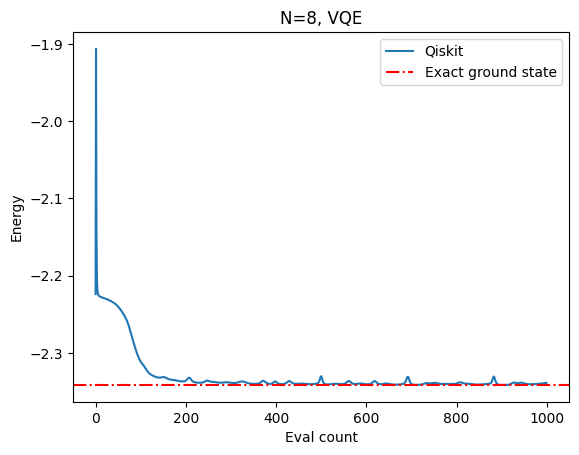

In [52]:
import numpy as np
import pylab
import matplotlib.pyplot as plt

#pylab.rcParams["figure.figsize"] = (12, 8)

#steps_np = np.asarray(steps)
#counts_np = np.asarray(counts)
#values_np = np.asarray(values)

#pylab.plot(range(maxiter),expectations[:maxiter], label=f"Qiskit VQE state")
pylab.plot(range(len(expectations)),expectations, label=f"Qiskit")
plt.axhline(y=E[0], color='r', linestyle='-.', label=f"Exact ground state")

pylab.xlabel("Eval count")
pylab.ylabel("Energy")
#pylab.title("Energy convergence for each computed state")
plt.title('N=8, VQE')
pylab.legend(loc="upper right")

# VQD

In [68]:
def makeAnsatzFull(N, L, param): 
    qr = QuantumRegister(N, 'q')
    qc = QuantumCircuit(qr)  
    
    for i in range(L):
        for k in range(N):
            qc.ry(param[k+N*i], qr[k])
        
        for j in range(N-1):
            for k in range(j+1,N):
                qc.cx(qr[j], qr[k])

    for k in range(N):
        qc.ry(param[k+N*L], qr[k])    
    
    return qc

In [69]:
def makeAnsatzLinear(N, L, param): 
    qr = QuantumRegister(N, 'q')
    qc = QuantumCircuit(qr)  
    
    for i in range(L):
        for k in range(N):
            qc.ry(param[k+N*i], qr[k])
        
        for j in range(N-1):
            qc.cx(qr[j], qr[j+1])
                
    for k in range(N):
        qc.ry(param[k+N*L], qr[k])
    
    return qc

In [70]:
simulator = AerSimulator(method='statevector')

In [71]:
L = 4
#simulator = BasicAer.get_backend("statevector_simulator")

def costFunctionVQD(param, ansatz, Ham, k, betas, statevectors, params, expectations):
    estimator = Estimator()
    #service = QiskitRuntimeService()
    params.append(param)
    
    #job = estimator.run(ansatz, Ham, param)
    job = estimator_v1.run([ansatz], [Ham], [param])
    result = job.result()
    exp = result.values[0]
    
    ansatz_time = 0.0
    execute_time = 0.0
    dot_time = 0.0
    
    start = time.time()
    qc = makeAnsatzFull(N, L, param)
    qc.save_statevector()
    #print('makeAnsatz() time: ', time.time() - start)
    ansatz_time += time.time() - start

    start = time.time()
    #job = execute(qc, backend = simulator)
    job = simulator.run(qc)
    result = job.result()
    psi = result.get_statevector(qc)
    #print('execute() time: ', time.time() - start)
    execute_time += time.time() - start
    
    for i in range(k):
        start = time.time()
        z = np.dot(np.conjugate(np.transpose(psi)), statevectors[i])
        norm_sq = np.conjugate(z) * z
        exp += betas[i] * norm_sq
        #print('inner prodction time: ', time.time() - start)
        dot_time += time.time() - start
        
    #print('ansatz_time: ', ansatz_time)
    #print('execute_time: ', execute_time)
    #print('dot_time: ', dot_time)    
    expectations.append(exp)
    
    return exp

In [72]:
# betas

In [73]:
estimator_v1

In [74]:
k = 2
N = 4
L = 4

In [75]:
import warnings
warnings.filterwarnings('ignore')

## COBYLA

In [76]:
params_list = []
expectations_list = []
final_exp = []
final_param = []
psi_list = []
maxiter = 5000
betas =[]
bound = Bounds(lb = -2 * np.pi, ub = 2 * np.pi)
total_time = time.time()

for i in range(k+1):
    params_list.append([])
    expectations_list.append([])

start_time = time.time()
result = minimize(costFunctionE1, x0, (ansatz, Ham_qiskit, params_list[0], expectations_list[0]), method='COBYLA', options={'maxiter': maxiter}, bounds=bound) 
print("--- Ground State computing time: %s seconds ---\n" % (time.time() - start_time))
final_param.append(result.x)
final_exp.append(result.fun)

for i in range(k):
    betas.append(33)
    qc = makeAnsatzFull(N, L, final_param[i])
    qc.save_statevector()
    #job = execute(qc, backend = simulator)
    job = simulator.run(qc)
    result = job.result()
    psi_list.append(result.get_statevector(qc))
    
    start_time = time.time()
    result = minimize(costFunctionVQD, x0, (ansatz, Ham_qiskit, i+1, betas, psi_list, params_list[i+1], expectations_list[i+1]), method='SLSQP', options={'maxiter': maxiter}, bounds=bound)
    print(f"--- {i+1}-th Excited State  time: %s seconds ---\n" % (time.time() - start_time))

    final_param.append(result.x)
    final_exp.append(result.fun)

print('\nTotal running time: ', time.time() - total_time)

--- Ground State computing time: 23.957622289657593 seconds ---

--- 1-th Excited State  time: 8.18870997428894 seconds ---

--- 2-th Excited State  time: 8.261136770248413 seconds ---


Total running time:  40.41527605056763


In [77]:
expectations_list[0][-1]

np.float64(-2.3367860490683667)

In [78]:
expectations_list[1][-1]

np.complex128(-2.341525304796029+0j)

In [79]:
expectations_list[2][-1]

np.complex128(-2.3415253128240203+0j)

In [80]:
E

array([-2.34152542, -1.40211303, -0.6755705 ,  0.33600419,  0.5       ])

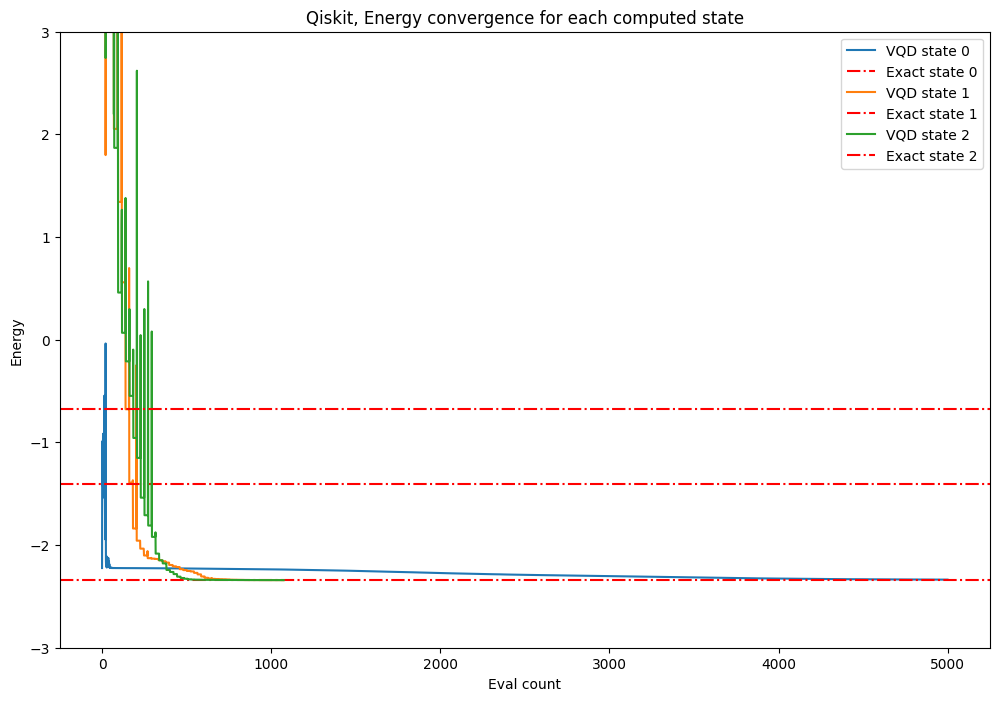

In [81]:
import numpy as np
import pylab
import matplotlib.pyplot as plt

pylab.rcParams["figure.figsize"] = (12, 8)

#steps_np = np.asarray(steps)
#counts_np = np.asarray(counts)
#values_np = np.asarray(values)

for i in range(1,k+2):
    #_counts = counts_np[np.where(steps_np == i)]
    #_values = values_np[np.where(steps_np == i)]
    pylab.plot(range(len(expectations_list[i-1])),expectations_list[i-1][:maxiter], label=f"VQD state {i-1}")
    plt.axhline(y=E[i-1], color='r', linestyle='-.', label=f"Exact state {i-1}")
    #plt.axhline(y=charge_less_E[i-1], color='b', linestyle='--', label=f"Charge Zero Exact state {i-1}")

pylab.xlabel("Eval count")
pylab.ylabel("Energy")
plt.ylim((-3,3))
pylab.title("Qiskit, Energy convergence for each computed state")
pylab.legend(loc="upper right")

#plt.savefig("VQD_Chargeless.pdf")

## Adam

## Stochastic Gradient Descent

## RMSprop